# Exploring Dandiset 000563: Allen Institute Openscope - Barcoding

**Note: This notebook was automatically generated by AI and has not been fully verified. Please interpret the code and any results with caution and consider reviewing before relying on them.**

---

This notebook will guide you through basic exploration and analysis of the dataset
[Allen Institute Openscope - Barcoding](https://dandiarchive.org/dandiset/000563/0.250311.2145), Dandiset `000563`, version `0.250311.2145`.

## Dandiset info:
- **Title:** Allen Institute Openscope - Barcoding
- **Dandiset ID:** DANDI:000563/0.250311.2145
- **Citation:** Reinagel, Pamela et al. (2025) Allen Institute Openscope - Barcoding (Version 0.250311.2145) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.000563/0.250311.2145
- **Keywords:** mouse, neuropixel, extracellular electrophysiology, neocortex, excitatory, inhibitory, barcoding, temporal, precision
- **License:** CC-BY-4.0

## Dataset Description

Some visual neurons have been shown to respond to white noise flicker visual stimuli with high temporal precision, particularly retinal ganglion cells and LGN relay cells. Responses to white noise stimulation are useful for a variety of analyses, including information theoretic measures and generative models of precise spike timing. However, the literature was lacking data on responses to white noise in cortical visual areas, or in the visual stream flowing through the superior colliculus.

This Dandiset provides "barcodes"—temporally precise response patterns—for visually responsive neurons throughout the mouse brain, enabling analyses of these unique neural identifiers. See the DANDI link above for further details.

---

## What you will find in this notebook

- Requirements: Packages assumed installed for this notebook (see below)
- How to load basic Dandiset metadata using the DANDI API
- List and explore assets (files) in the dataset
- How to stream an NWB file from the DANDI archive
- How to explore acquisition data, e.g., LFP
- How to inspect electrode tables and structure
- How to visualize extracted data (e.g., LFP traces)
- Guidance and code comments to help adapt the analysis for your own purposes

---

## Requirements

The following packages are used (they should already be installed):

- dandi
- pynwb
- h5py
- remfile
- pandas
- numpy
- matplotlib
- seaborn

If these are not available, please install them before running the notebook.

---

## Load Dandiset metadata and assets using the DANDI API

In [1]:
# Basic example: listing Dandiset metadata and assets
from itertools import islice
from dandi.dandiapi import DandiAPIClient

dandiset_id = "000563"
dandiset_version = "0.250311.2145"

client = DandiAPIClient()
dandiset = client.get_dandiset(dandiset_id, dandiset_version)
metadata = dandiset.get_raw_metadata()

print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['identifier']}")

# List assets in the Dandiset (first 5 shown)
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Barcoding
Dandiset URL: DANDI:000563

First 5 assets:
- sub-699241/sub-699241_ses-1318772854_probe-1_ecephys.nwb (ID: 55148cf3-9d15-4d05-a190-4a73e007e48d)
- sub-699241/sub-699241_ses-1318772854_probe-3_ecephys.nwb (ID: 1b6325a9-1fc2-4fed-999c-d7c3aeb7a7a1)
- sub-699241/sub-699241_ses-1318772854_probe-4_ecephys.nwb (ID: 6e4d0047-ca6b-4d29-b150-bc9e2c445646)
- sub-699241/sub-699241_ses-1318772854_probe-0_ecephys.nwb (ID: 54cef618-72de-4c69-b441-8bd5e26049c5)
- sub-699241/sub-699241_ses-1318772854_ogen.nwb (ID: c3bbf094-904e-43b7-83d5-be5a8bf3826f)


---
## Select an NWB file for exploration

Let's pick one NWB file in the Dandiset.

**File chosen:**  
`sub-681446/sub-681446_ses-1290510496_probe-0_ecephys.nwb`

**Asset ID:**  
`1f158fe0-f8ef-495e-b031-da25316a335c`

**Direct remote URL:**  
[`https://api.dandiarchive.org/api/assets/1f158fe0-f8ef-495e-b031-da25316a335c/download/`](https://api.dandiarchive.org/api/assets/1f158fe0-f8ef-495e-b031-da25316a335c/download/)

[**View this NWB file on Neurosift**](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/1f158fe0-f8ef-495e-b031-da25316a335c/download/&dandisetId=000563&dandisetVersion=draft)

---

## Streaming and exploring the NWB file

This section shows how to load the NWB file directly from the DANDI archive using PyNWB, remfile, and h5py. We will extract metadata, inspect acquisition data structures, and display basic LFP data.

**Note**: This file is large (~1.6 GB). We will load only a small segment for illustration.

In [2]:
import pynwb
import h5py
import remfile

nwb_url = "https://api.dandiarchive.org/api/assets/1f158fe0-f8ef-495e-b031-da25316a335c/download/"
# Open remotely
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file, "r")
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()

print(f"session_description: {nwb.session_description}")
print(f"identifier: {nwb.identifier}")
print(f"session_start_time: {nwb.session_start_time}")
print(f"file_create_date: {nwb.file_create_date}")
print(f"institution: {nwb.institution}")
print(f"subject_id: {nwb.subject.subject_id if nwb.subject else None}")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


session_description: LFP data and associated info for one probe
identifier: 0
session_start_time: 2023-08-16 00:00:00-07:00
file_create_date: [datetime.datetime(2024, 2, 22, 21, 57, 24, 803516, tzinfo=tzoffset(None, -28800))]
institution: Allen Institute for Brain Science
subject_id: 681446


### NWB file structure overview

- **Session:** {nwb.session_id} | {nwb.session_description}
- **Institution:** {nwb.institution}
- **Subject:** {nwb.subject.subject_id if nwb.subject else None}, {nwb.subject.species if nwb.subject else None}, Sex: {nwb.subject.sex if nwb.subject else None}, Age: {nwb.subject.age if nwb.subject else None}
- **Acquisition keys:** `list(nwb.acquisition.keys())`
- **Electrodes table columns:** `nwb.electrodes.colnames`
- **Number of electrodes:** `nwb.electrodes.shape[0]`

---

In [3]:
print("--- File structure summary ---")
print("Acquisition keys:", list(nwb.acquisition.keys()))
print("Electrodes table columns:", nwb.electrodes.colnames)
print("Number of electrodes:", nwb.electrodes.shape[0])

--- File structure summary ---
Acquisition keys: ['probe_0_lfp', 'probe_0_lfp_data']
Electrodes table columns: ('location', 'group', 'group_name', 'probe_vertical_position', 'probe_horizontal_position', 'probe_id', 'local_index', 'valid_data', 'x', 'y', 'z', 'imp', 'filtering')


AttributeError: 'DynamicTable' object has no attribute 'shape'

### NWB Structural Summary (in table/tree form)

| Section              | Details                                             |
|----------------------|-----------------------------------------------------|
| Session              | {nwb.session_id}                                    |
| Institution          | {nwb.institution}                                   |
| Subject              | {nwb.subject.subject_id if nwb.subject else None}   |
| Subject species      | {nwb.subject.species if nwb.subject else None}      |
| Acquisition          | {list(nwb.acquisition.keys())}                      |
| Electrodes cols      | {nwb.electrodes.colnames}                           |
| # of electrodes      | {nwb.electrodes.shape[0]}                           |

## Electrode Table: Metadata

The NWB file provides a comprehensive electrodes table, describing each electrode's properties (location, probe information, etc.).  
Example rows (first 5 electrodes):

In [4]:
import pandas as pd
edft = nwb.electrodes.to_dataframe()
display(edft.head())  # Show first 5 rows

,location,group,group_name,probe_vertical_position,probe_horizontal_position,probe_id,local_index,valid_data,x,y,z,imp,filtering
id,,,,,,,,,,,,,
2,APN,probeA abc.EcephysElectrodeGroup at 0x12488359...,probeA,40,59,0,2,True,8064.0,3068.0,7299.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
6,APN,probeA abc.EcephysElectrodeGroup at 0x12488359...,probeA,80,59,0,6,True,8056.0,3032.0,7305.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
10,APN,probeA abc.EcephysElectrodeGroup at 0x12488359...,probeA,120,59,0,10,True,8049.0,2996.0,7312.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
14,APN,probeA abc.EcephysElectrodeGroup at 0x12488359...,probeA,160,59,0,14,True,8040.0,2952.0,7320.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
18,APN,probeA abc.EcephysElectrodeGroup at 0x12488359...,probeA,200,59,0,18,True,8032.0,2916.0,7326.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...


## Load and visualize example LFP data

This example shows how to access a segment of LFP data from `probe_0_lfp_data`, part of the `acquisition` group. **Note:** We'll load only a short timespan and select a few channels for demonstration.

The LFP data shape is (10168076, 73), corresponding to samples × channels.

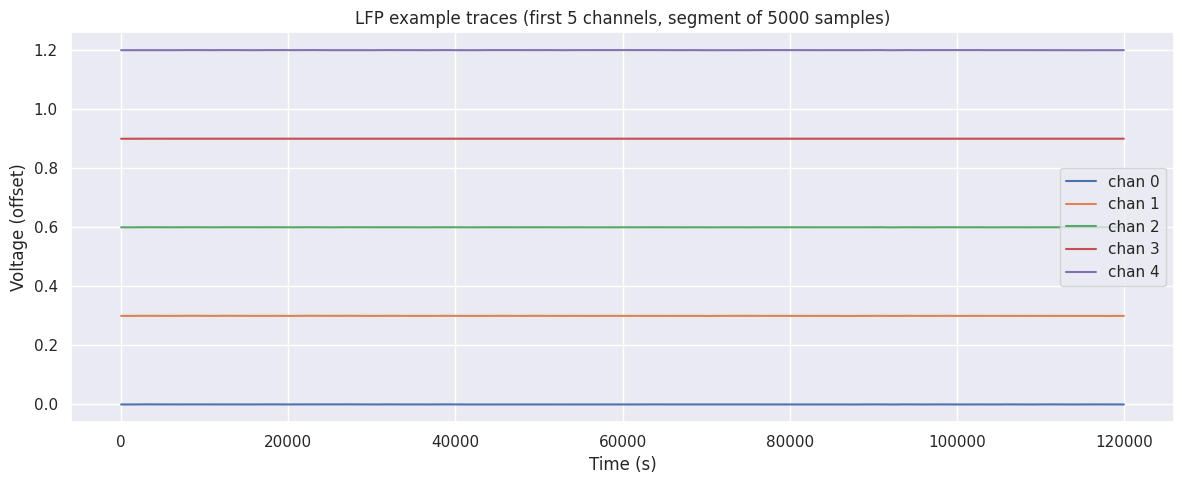

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
probe_0_lfp_data = nwb.acquisition["probe_0_lfp"].electrical_series["probe_0_lfp_data"]

# Parameters for plotting
n_samples = 5000  # Short segment (illustrative)
channels_to_plot = [0, 1, 2, 3, 4]  # Show first 5 channels
data = probe_0_lfp_data.data[0:n_samples, channels_to_plot]  # (n_samples, len(channels))
timestamps = probe_0_lfp_data.timestamps[0:n_samples]  # (n_samples, )

plt.figure(figsize=(12, 5))
offsets = np.arange(len(channels_to_plot)) * 0.3
for i, ch in enumerate(channels_to_plot):
    plt.plot(timestamps, data[:, i] + offsets[i], label=f'chan {ch}')
plt.xlabel("Time (s)")
plt.ylabel("Voltage (offset)")
plt.title("LFP example traces (first 5 channels, segment of 5000 samples)")
plt.legend()
plt.tight_layout()
plt.show()

---
## Electrode locations: By brain area

Let's see how the electrodes are distributed across different brain regions (based on the "location" column in the electrode table).

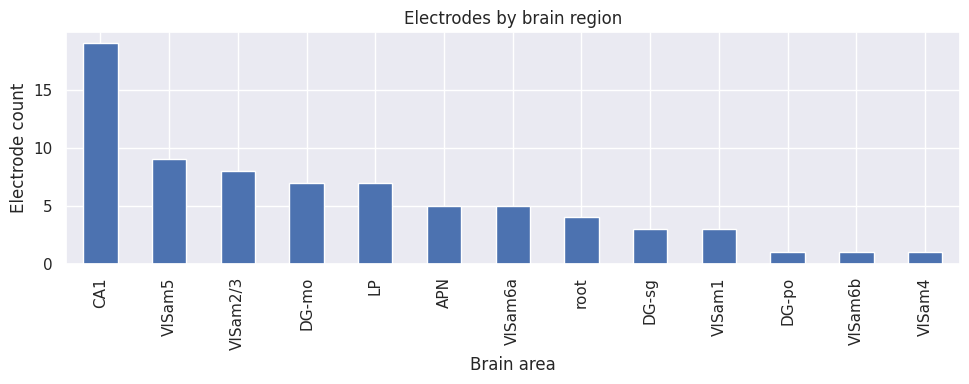

In [6]:
region_counts = edft['location'].value_counts()
region_counts.plot(kind='bar', figsize=(10, 4))
plt.xlabel("Brain area")
plt.ylabel("Electrode count")
plt.title("Electrodes by brain region")
plt.tight_layout()
plt.show()

## Summary and future directions

In this notebook, we demonstrated:

- How to access and list metadata for a DANDI dataset
- How to stream and explore the structure of a remote NWB file
- How to load and visualize segments of LFP data
- How to inspect electrode metadata, including locations

**Potential next steps for analysis:**

- Explore relationships between anatomical locations, LFP features, and optogenetic responses (if present)
- Quantify and visualize LFP dynamics across channels or brain regions
- Integrate with unit spike data if available, or relate LFP and unit activity
- Further explore "barcode"-like response patterns as hypothesized in the dataset's description

For full detail, consult the [Dandiset page](https://dandiarchive.org/dandiset/000563/0.250311.2145) and the [Neurosift view of this NWB file](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/1f158fe0-f8ef-495e-b031-da25316a335c/download/&dandisetId=000563&dandisetVersion=draft).

---

**Reminder:** This notebook is AI-generated, not fully reviewed, and may contain mistakes. Always verify code and results before drawing conclusions.